In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Load the Air Passengers dataset
data = pd.read_csv("AirPassengers.csv", header=0,index_col=0,parse_dates=True)

In [2]:
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
#A. Checking Stationary
#C. Implementing Dickey Fuller Test
def check_stationary(data):
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
check_stationary(data)


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [6]:

#B. Converting a non-stationary data to stationary
def make_stationary(data):
    stationary_data = data.diff().dropna()
    return stationary_data
stationary_data = make_stationary(data)

In [7]:

check_stationary(stationary_data)


ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


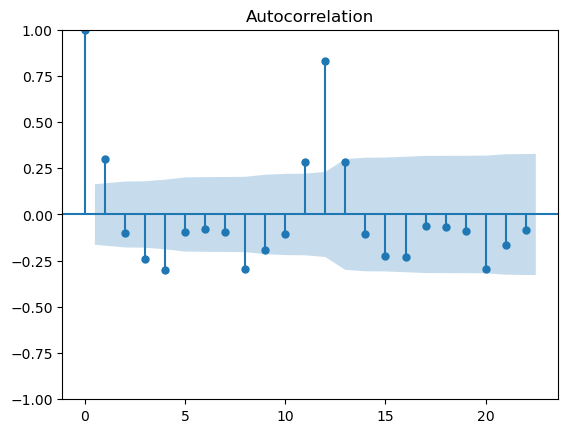

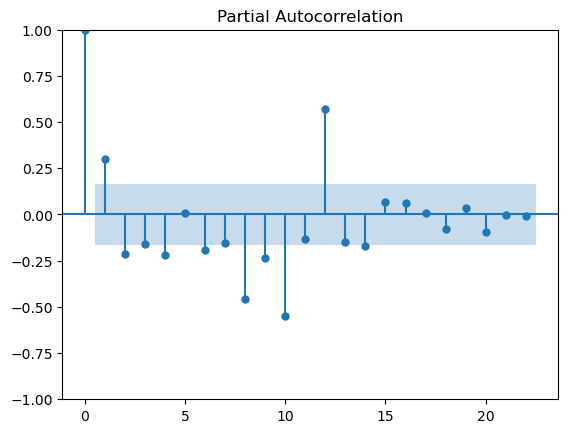

In [8]:
#D. Plot ACF and PACF
plot_acf(stationary_data)
plot_pacf(stationary_data)
plt.show()

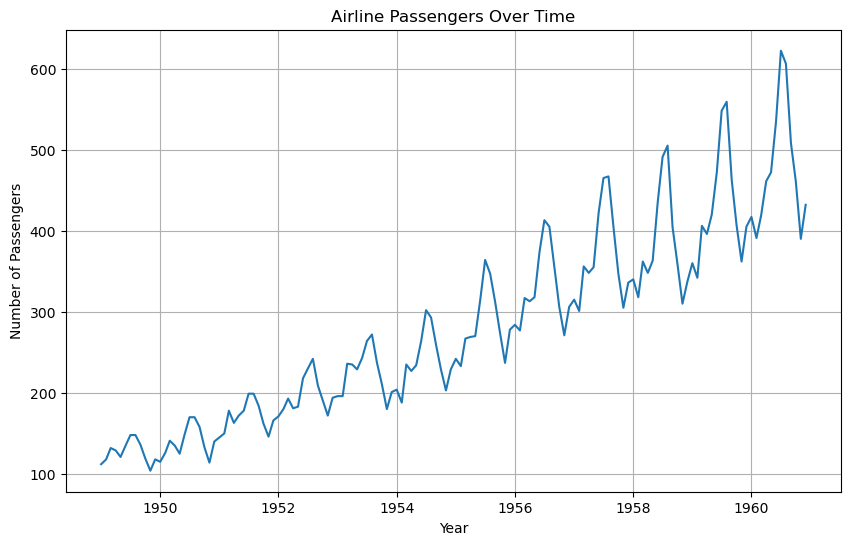

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["#Passengers"])
plt.title("Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

In [10]:
#E. Generating the Arima Plot
import pmdarima as pm
auto_model = pm.auto_arima(data, seasonal=False, stepwise=True,
                           suppress_warnings=True, trace=True,
                           error_action='ignore', information_criterion='aic')
print("Optimal (p, d, q) values:", auto_model.order)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

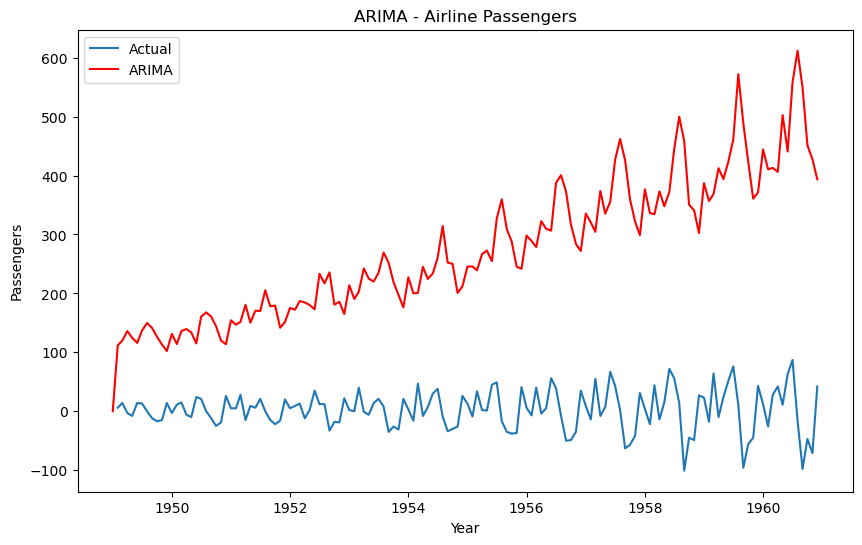

In [11]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(4, 1, 3))
model_fit = model.fit()

# Plot the stationary series and fitted values
plt.figure(figsize=(10, 6))
plt.plot(stationary_data, label="Actual")
plt.plot(model_fit.fittedvalues, color='red', label="ARIMA")
plt.title("ARIMA - Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [12]:
#F. TSA forecasting
forecast = model_fit.forecast(steps=10)
print("Forecasted values:\n", forecast)

Forecasted values:
 1961-01-01    467.573921
1961-02-01    490.494800
1961-03-01    509.137183
1961-04-01    492.554956
1961-05-01    495.306041
1961-06-01    475.947797
1961-07-01    476.339808
1961-08-01    475.552121
1961-09-01    472.353871
1961-10-01    483.889755
Freq: MS, Name: predicted_mean, dtype: float64
